# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import FunctionTransformer, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
data = pd.read_csv("../dataset/train_cholesterol.csv")
test = pd.read_csv("../dataset/test_cholesterol.csv")
data.head()

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir,Cholesterol Total (mg/dL)
0,M,35.0,120.0,78.0,164.0,47.60,18.00,65.0,84.0,143.0,26.4,6.0,15.00,Bogor,179.0
1,M,29.0,100.0,66.0,162.9,68.50,25.81,87.0,84.0,90.0,26.4,6.0,6.33,Tasikmalaya,198.0
2,M,38.0,110.0,78.0,155.0,68.25,27.70,84.0,84.0,46.0,26.4,6.0,24.00,Banjarnegara,153.0
3,M,27.0,110.0,65.0,160.0,53.65,21.30,65.0,84.0,99.0,26.4,6.0,4.00,Bogor,187.0
4,M,36.0,100.0,70.0,170.0,77.35,26.76,93.0,81.0,88.0,25.2,12.0,16.00,Nias,178.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis Kelamin              1071 non-null   object 
 1   Usia                       1071 non-null   float64
 2   Tekanan darah  (S)         1071 non-null   float64
 3   Tekanan darah  (D)         1071 non-null   float64
 4   Tinggi badan (cm)          1071 non-null   float64
 5   Berat badan (kg)           1071 non-null   float64
 6   IMT (kg/m2)                1071 non-null   float64
 7   Lingkar perut (cm)         1071 non-null   float64
 8   Glukosa Puasa (mg/dL)      1071 non-null   float64
 9   Trigliserida (mg/dL)       1071 non-null   float64
 10  Fat                        1071 non-null   float64
 11  Visceral Fat               1071 non-null   float64
 12  Masa Kerja                 1071 non-null   float64
 13  Tempat lahir               1071 non-null   objec

In [4]:
data.describe()

,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Cholesterol Total (mg/dL)
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,28.563025,113.071895,73.867414,164.954435,64.660551,23.709869,80.467320,84.521942,107.000000,26.214099,6.190289,6.332260,188.139122
std,4.731432,10.132554,7.701267,7.438620,12.779196,4.026620,10.585122,10.973683,42.343411,3.733596,2.312534,4.543245,21.597643
min,19.000000,80.000000,58.000000,138.500000,38.500000,14.850000,54.000000,65.000000,34.000000,5.800000,0.500000,0.000000,103.000000
25%,25.000000,110.000000,70.000000,160.000000,55.350000,20.860000,73.000000,84.000000,99.000000,26.400000,6.000000,4.000000,187.000000
50%,28.000000,110.000000,72.000000,165.000000,62.650000,23.200000,80.000000,84.000000,99.000000,26.400000,6.000000,6.000000,187.000000
75%,31.000000,120.000000,80.000000,170.350000,71.700000,26.050000,87.000000,84.000000,99.000000,26.400000,6.000000,8.000000,187.000000
max,39.000000,170.000000,100.000000,187.500000,139.750000,44.100000,128.000000,321.000000,634.000000,40.900000,22.000000,31.000000,308.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
#Type your code here
data.sample(5)

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir,Cholesterol Total (mg/dL)
302,M,27.0,100.0,68.0,160.5,59.00,22.90,80.0,84.0,99.0,26.4,6.0,4.20,Bogor,187.0
1052,M,37.0,100.0,70.0,166.0,67.90,24.60,77.0,84.0,70.0,26.4,6.0,8.12,Bogor,172.0
386,F,23.0,110.0,75.0,157.0,44.85,18.00,59.0,84.0,99.0,26.4,6.0,3.00,Temanggung,187.0
422,M,30.0,120.0,80.0,166.0,63.90,23.19,81.0,84.0,159.0,26.4,6.0,2.00,Pamekasan,212.0
640,F,27.0,120.0,70.0,158.0,71.00,28.44,97.0,84.0,99.0,26.4,6.0,5.00,Jakarta,187.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Jenis Kelamin              1071 non-null   object 
 1   Usia                       1071 non-null   float64
 2   Tekanan darah  (S)         1071 non-null   float64
 3   Tekanan darah  (D)         1071 non-null   float64
 4   Tinggi badan (cm)          1071 non-null   float64
 5   Berat badan (kg)           1071 non-null   float64
 6   IMT (kg/m2)                1071 non-null   float64
 7   Lingkar perut (cm)         1071 non-null   float64
 8   Glukosa Puasa (mg/dL)      1071 non-null   float64
 9   Trigliserida (mg/dL)       1071 non-null   float64
 10  Fat                        1071 non-null   float64
 11  Visceral Fat               1071 non-null   float64
 12  Masa Kerja                 1071 non-null   float64
 13  Tempat lahir               1071 non-null   objec

In [7]:
data = data.drop(columns='Tempat lahir', axis=1)
test = test.drop(columns='Tempat lahir', axis=1)

In [8]:
data.describe(include='all')

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Cholesterol Total (mg/dL)
count,1071,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,28.563025,113.071895,73.867414,164.954435,64.660551,23.709869,80.467320,84.521942,107.000000,26.214099,6.190289,6.332260,188.139122
std,NaN,4.731432,10.132554,7.701267,7.438620,12.779196,4.026620,10.585122,10.973683,42.343411,3.733596,2.312534,4.543245,21.597643
min,NaN,19.000000,80.000000,58.000000,138.500000,38.500000,14.850000,54.000000,65.000000,34.000000,5.800000,0.500000,0.000000,103.000000
25%,NaN,25.000000,110.000000,70.000000,160.000000,55.350000,20.860000,73.000000,84.000000,99.000000,26.400000,6.000000,4.000000,187.000000
50%,NaN,28.000000,110.000000,72.000000,165.000000,62.650000,23.200000,80.000000,84.000000,99.000000,26.400000,6.000000,6.000000,187.000000
75%,NaN,31.000000,120.000000,80.000000,170.350000,71.700000,26.050000,87.000000,84.000000,99.000000,26.400000,6.000000,8.000000,187.000000


In [9]:
numeric_features = data.select_dtypes(include=['number']).columns
categorical_features = data.select_dtypes(exclude=['number']).columns

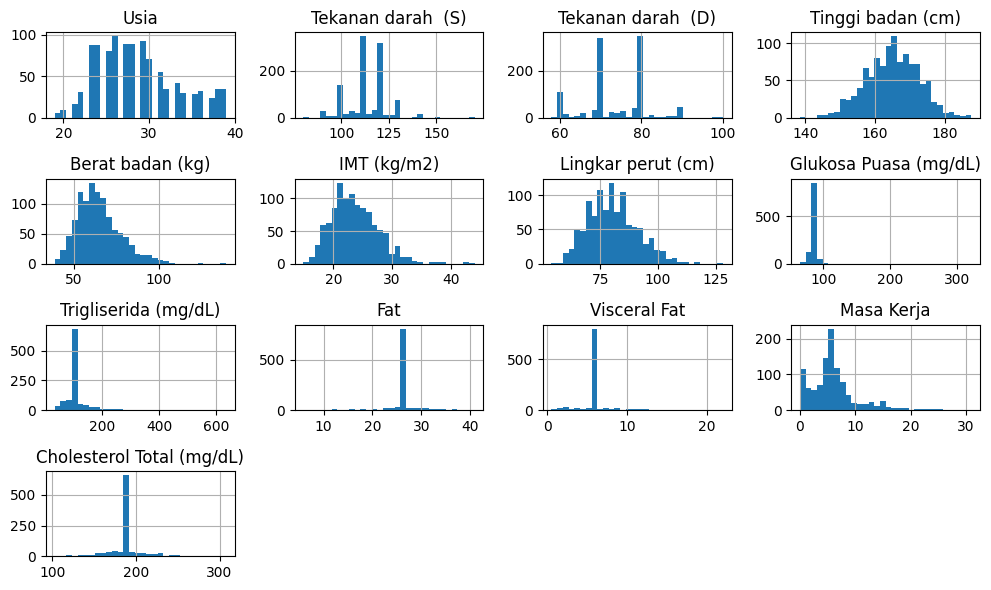

In [10]:
data[numeric_features].hist(figsize=(10, 6), bins=30)
plt.tight_layout()
plt.show()

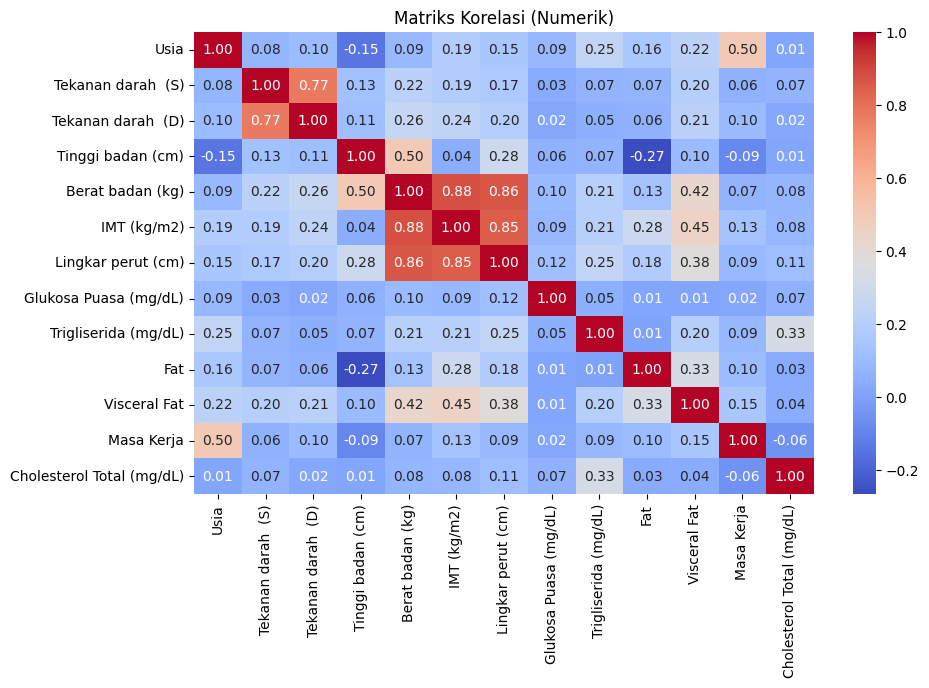

In [11]:
correlation_matrix = data[numeric_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi (Numerik)")
plt.show()

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_11572\1045084951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=korelasi_dg_colesterol.values, y=korelasi_dg_colesterol.index, palette=colors)


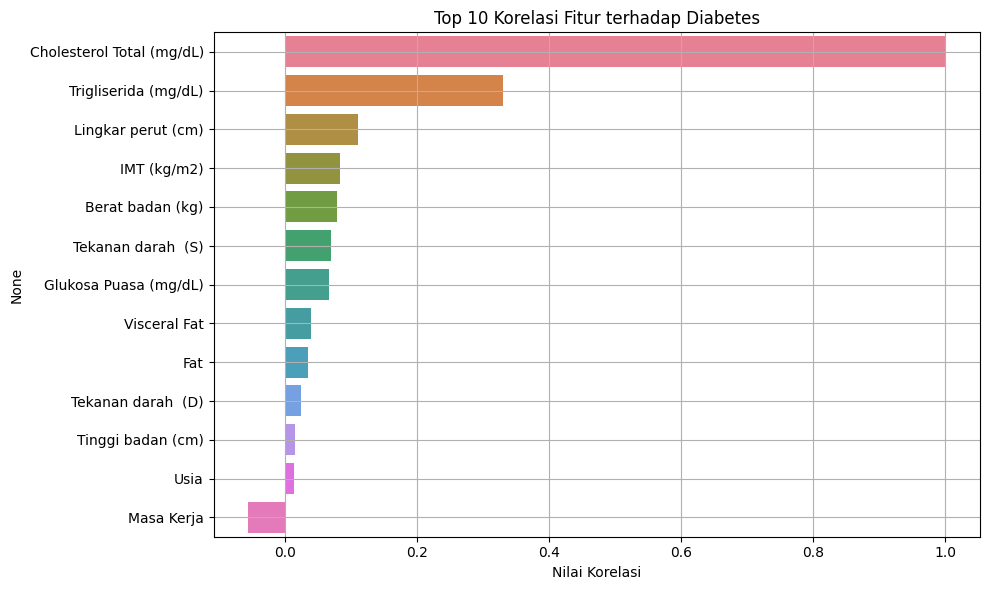

In [12]:
korelasi_dg_colesterol = data[numeric_features].corrwith(data['Cholesterol Total (mg/dL)']).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(korelasi_dg_colesterol))  # palet warna berbeda
sns.barplot(x=korelasi_dg_colesterol.values, y=korelasi_dg_colesterol.index, palette=colors)
plt.title('Top 10 Korelasi Fitur terhadap Diabetes')
plt.xlabel('Nilai Korelasi')
plt.tight_layout()
plt.grid(True)
plt.show()

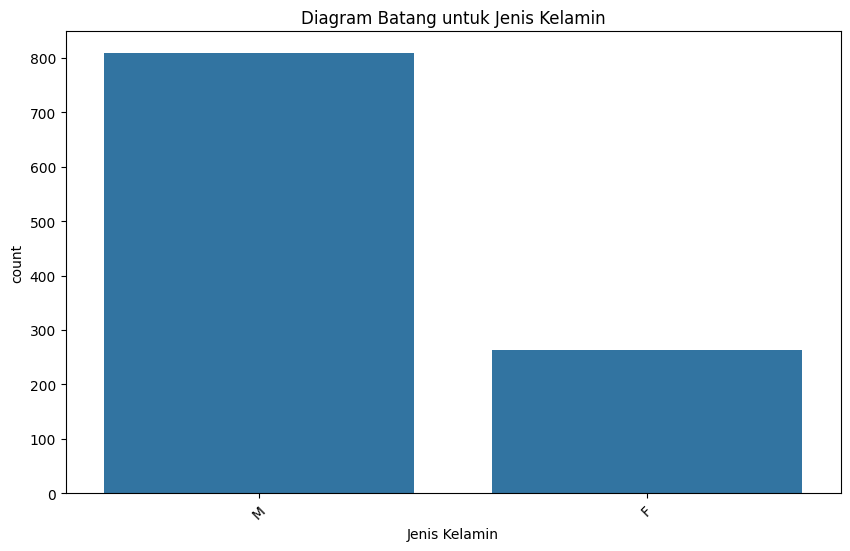

In [13]:
# Visualisasi diagram batang untuk fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f"Diagram Batang untuk {feature}")
    plt.xticks(rotation=45)

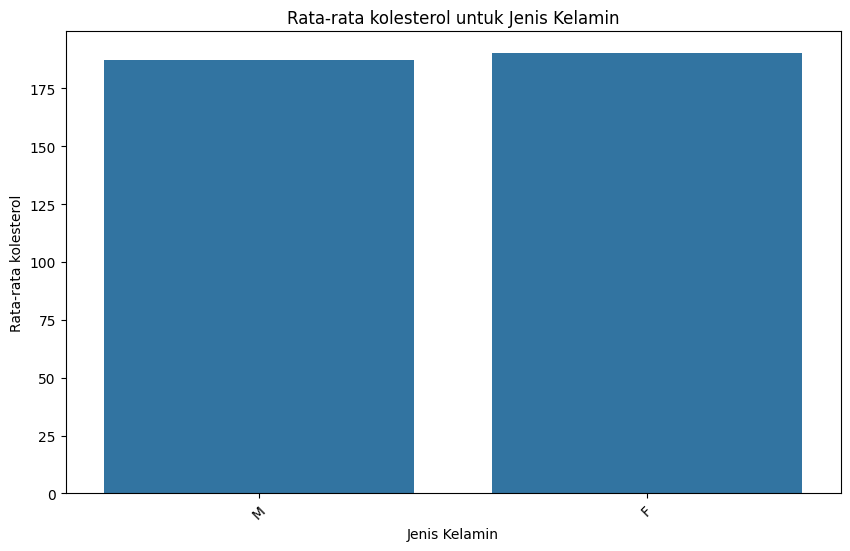

In [14]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=feature,
        y="Cholesterol Total (mg/dL)",
        data=data,
        estimator=np.mean,
        errorbar=None  # kalau tidak mau ada error bar
    )
    plt.title(f"Rata-rata kolesterol untuk {feature}")
    plt.xticks(rotation=45)
    plt.ylabel("Rata-rata kolesterol")
    plt.xlabel(feature)
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Identifikasi missing values

In [15]:
data.isnull().sum()

Jenis Kelamin                0
Usia                         0
Tekanan darah  (S)           0
Tekanan darah  (D)           0
Tinggi badan (cm)            0
Berat badan (kg)             0
IMT (kg/m2)                  0
Lingkar perut (cm)           0
Glukosa Puasa (mg/dL)        0
Trigliserida (mg/dL)         0
Fat                          0
Visceral Fat                 0
Masa Kerja                   0
Cholesterol Total (mg/dL)    0
dtype: int64

In [16]:
data =  data.dropna()

### Identifikasi Duplikasi Data

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
data =  data.drop_duplicates()

### Penganganan Outliers

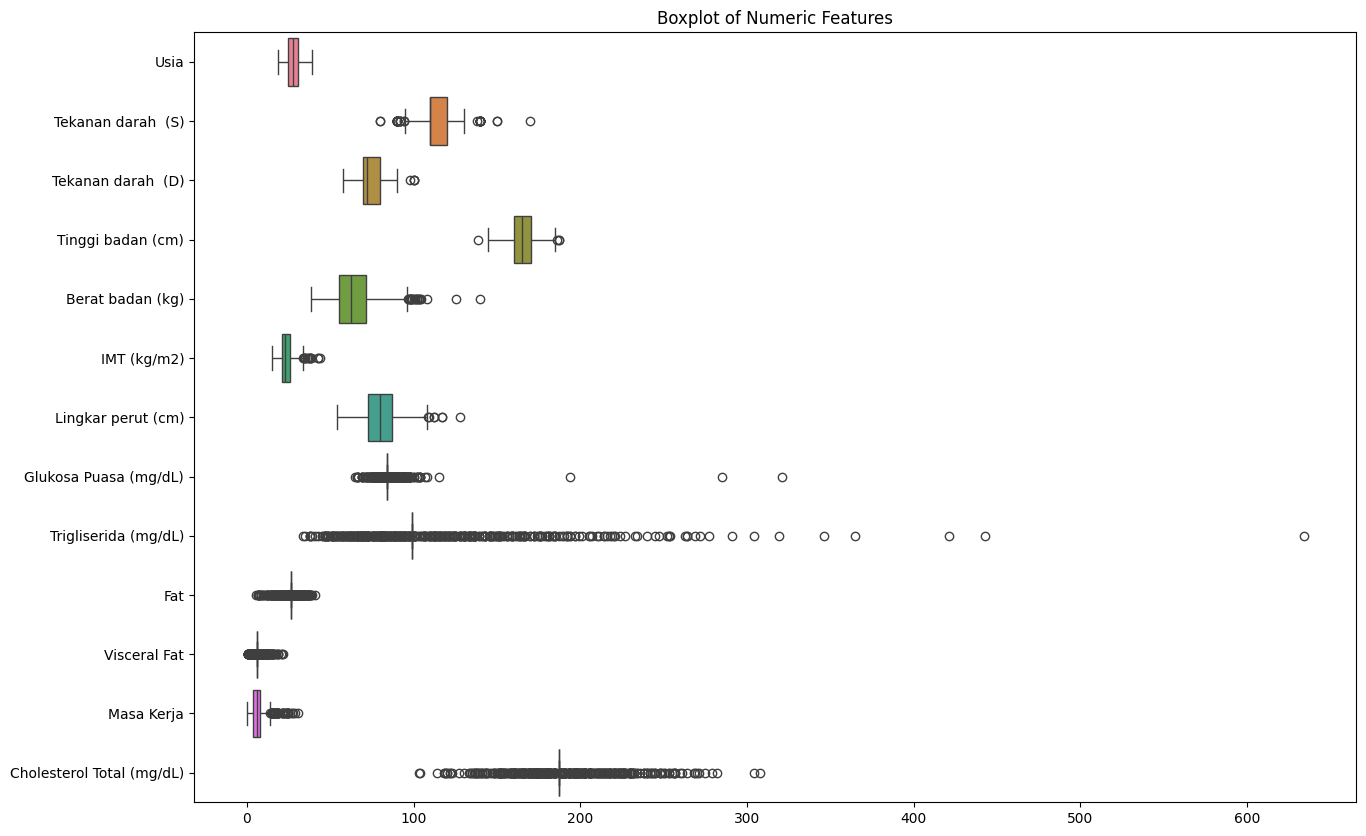

In [19]:
# Cek outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numeric_features], orient='h')
plt.title('Boxplot of Numeric Features')    
plt.show()

In [20]:
data[numeric_features].skew()

Usia                          0.531906
Tekanan darah  (S)            0.136854
Tekanan darah  (D)            0.040869
Tinggi badan (cm)            -0.076243
Berat badan (kg)              0.918567
IMT (kg/m2)                   0.830154
Lingkar perut (cm)            0.441328
Glukosa Puasa (mg/dL)        16.052529
Trigliserida (mg/dL)          4.248396
Fat                          -1.708616
Visceral Fat                  2.190684
Masa Kerja                    1.666186
Cholesterol Total (mg/dL)     0.747896
dtype: float64

In [21]:
log_features = ["Trigliserida (mg/dL)", "Glukosa Puasa (mg/dL)"]

# transformer log + scaling
log_transformer = Pipeline(steps=[
    ("log", FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=False)),
    ("scaler", RobustScaler())
])

Membuat pipeline log transform untuk mentransformasi logaritma pada fitur glukosa puasa dan trigliserida untuk tetap mempertahankan outliers tanpa memengaruhi model secara signifikan

### Encoding Data Kategorikal

In [22]:
# fitur kategorikal
cat_features = ["Jenis Kelamin"]

# transformer kategorikal
cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first"))
])

### Binning (Pengelompokan Data)

In [23]:
def binning_usia(X):
    bins = [18, 24, 29, 34, 39]
    labels = [0, 1, 2, 3]
    return pd.cut(X.squeeze(), bins=bins, labels=labels, include_lowest=True).astype(int).to_frame()

# pipeline khusus untuk usia
usia_transformer = Pipeline(steps=[
    ("binning", FunctionTransformer(binning_usia, validate=False))
])

### Normalisasi/Standardisasi Fitur

In [24]:
# transformer numeric biasa
num_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

### Menggabungkan Semua Preprocessing

In [25]:
target = "Cholesterol Total (mg/dL)"

other_features = [
    col for col in numeric_features 
    if col not in log_features and col not in [target, "Usia"]
]

clean_dataframe = lambda df: df.dropna().drop_duplicates()
clean_transformer = FunctionTransformer(clean_dataframe, validate=False)

pipe = Pipeline(steps=[
    ("clean", clean_transformer),
    ("preprocess", ColumnTransformer(
        transformers=[
            ("log_num", log_transformer, log_features),
            ("num", num_transformer, other_features),
            ("cat", cat_transformer, cat_features),
            ("enco", usia_transformer, ["Usia"])
        ]
    ))
])

all_features = [
    *log_features,
    *other_features,
    *cat_features,
    "Usia"
]

In [26]:
X_train = data.drop(target, axis=1)
y_train = data[target]

X_test = test.drop(target, axis=1)
y_test = test[target]

pipe.fit(X_train)

X_train_trans = pipe.transform(X_train)
X_test_trans  = pipe.transform(X_test)

In [27]:
X_train_trans = pd.DataFrame(
    X_train_trans,
    index=X_train.index,
    columns=all_features
)

X_test_trans = pd.DataFrame(
    X_test_trans,
    index=X_test.index,
    columns=all_features
)

train_processed = X_train_trans.copy()
train_processed[target] = y_train

test_processed = X_test_trans.copy()
test_processed[target] = y_test

In [29]:
train_processed.head()

,Trigliserida (mg/dL),Glukosa Puasa (mg/dL),Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Fat,Visceral Fat,Masa Kerja,Jenis Kelamin,Usia,Cholesterol Total (mg/dL)
0,0.364643,0.000000,1.0,0.6,-0.096618,-0.920489,-1.001927,-1.071429,0.0,0.0,2.2500,1.0,3.0,179.0
1,-0.094311,0.000000,-1.0,-0.6,-0.202899,0.357798,0.502890,0.500000,0.0,0.0,0.0825,1.0,1.0,198.0
2,-0.755023,0.000000,0.0,0.6,-0.966184,0.342508,0.867052,0.285714,0.0,0.0,4.5000,1.0,3.0,153.0
3,0.000000,0.000000,0.0,-0.7,-0.483092,-0.550459,-0.366089,-1.071429,0.0,0.0,-0.5000,1.0,1.0,187.0
4,-0.116534,-0.035932,-1.0,-0.2,0.483092,0.899083,0.685934,0.928571,-1.2,6.0,2.5000,1.0,3.0,178.0


In [30]:
test_processed.head()

,Trigliserida (mg/dL),Glukosa Puasa (mg/dL),Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Fat,Visceral Fat,Masa Kerja,Jenis Kelamin,Usia,Cholesterol Total (mg/dL)
0,0.0,0.000000,0.0,0.8,0.000000,-0.009174,0.000000,0.000000,0.0,0.0,-0.5000,1.0,1.0,394
1,0.0,0.000000,1.0,1.8,0.676329,1.541284,1.252408,1.071429,0.0,0.0,0.0000,1.0,2.0,881
2,0.0,0.000000,1.2,1.0,-0.144928,-0.039755,-0.001927,0.285714,0.0,0.0,-0.4025,1.0,1.0,358
3,0.0,0.000000,1.0,0.8,0.096618,-0.620795,-0.799615,-0.428571,0.0,0.0,0.0000,1.0,1.0,367
4,0.0,-0.035932,1.0,0.8,-0.048309,2.409786,2.793834,2.357143,0.0,0.0,0.0050,1.0,0.0,259


In [28]:
train_processed.to_csv("preprocessed_data/train_processed.csv", index=False)
test_processed.to_csv("preprocessed_data/test_processed.csv", index=False)